In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
mnist_train = np.load('data/mnist_train.npy')
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
mnist_test = np.load('data/mnist_test.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

1.0
1.0
1.9019607901573181


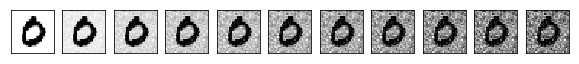

In [60]:
%matplotlib inline
index = 3
noise = np.random.randn(28, 28, 1)
# noise = np.ones(shape=(28,28,1))
noise = noise / max(noise.max(), noise.min())
print(noise.max())
print(image.max())
print((noise+image).max())
image = mnist_test[index]

fig = plt.figure(figsize=(10, 4))
for i in range(11):
    ax = fig.add_subplot(1,11, i+1)
    noisy_image = np.clip(image + i/10 * noise, -1, 1)
    ax.imshow(noisy_image.reshape(28,28), cmap=plt.cm.gray_r) 
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
noise = np.random.randn